In [46]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#import matplotlib.pyplot as plt
from pendulum import Record
import matplotlib.pyplot as plt

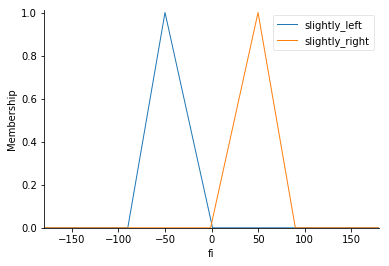

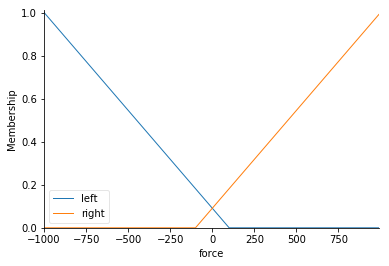

In [3]:
fi = ctrl.Antecedent(np.arange(-180, 180, 0.1), 'fi')
force = ctrl.Consequent(np.arange(-1000, 1000, 10), 'force')

fi['slightly_left'] = fuzz.trimf(fi.universe, [-90, -50, 1])
fi['slightly_right'] = fuzz.trimf(fi.universe, [-1, 50, 90])

force['left'] = fuzz.trimf(force.universe, [-1000, -1000, 100])
force['right'] = fuzz.trimf(force.universe, [-100, 1000, 1000])

fi.view()
force.view()

In [4]:
rule1 = ctrl.Rule(fi['slightly_right'], force['right'])
rule2 = ctrl.Rule(fi['slightly_left'], force['left'])

In [5]:
force_controler = ctrl.ControlSystem([rule1, rule2])
estimated_force = ctrl.ControlSystemSimulation(force_controler)

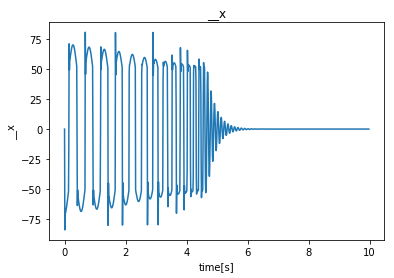

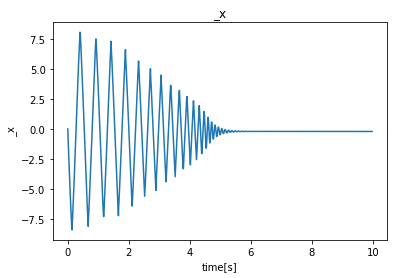

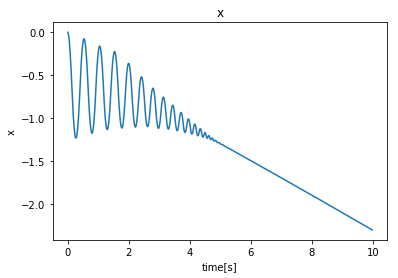

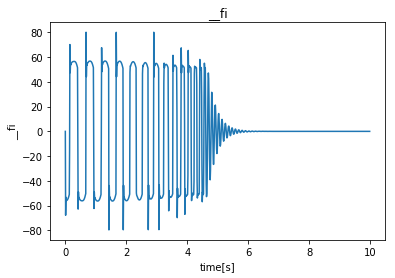

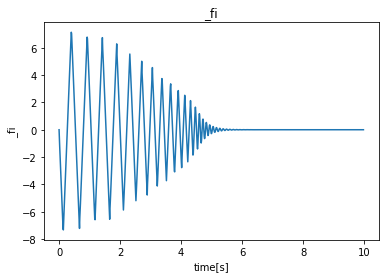

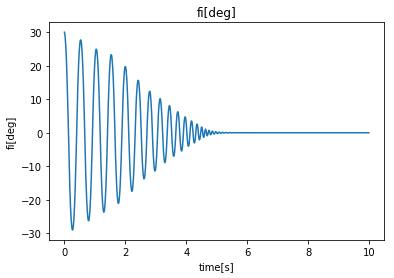

In [6]:
r = Record()
r.position_set(30)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(1000):
    estimated_force.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force.input['x'] = r.record['x'][0]
    #estimated_force.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force.compute()

    r.move([(estimated_force.output['force'], 0.01)], dt_min=0.01)
    """
    print("angle: %0.2f  position: %0.2f  speed: %0.2f  force: %0.2f" % (r.record['fi'][0]*180/np.pi, 
                                                                         r.record['x'][0], 
                                                                         r.record['_fi'][0],
                                                                         estimated_force.output['force']))
    """
r.visualize(['move'], r.stack_of_movement, separately=True)

Oscillations are decreasing, yet it is quite time-consuming; it is necessary to reduce them

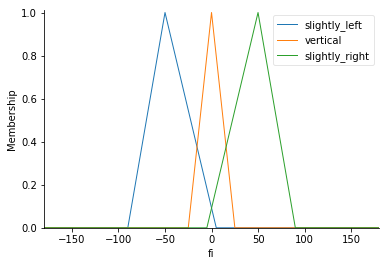

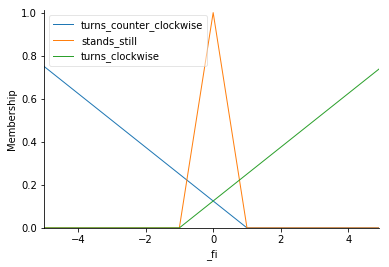

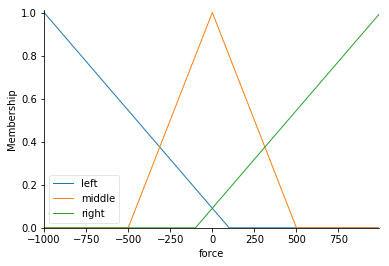

In [7]:
fi = ctrl.Antecedent(np.arange(-180, 180, 0.1), 'fi')
_fi = ctrl.Antecedent(np.arange(-5, 5, 0.1), '_fi')
force = ctrl.Consequent(np.arange(-1000, 1000, 10), 'force')


fi['slightly_left'] = fuzz.trimf(fi.universe, [-90, -50, 5])
fi['vertical'] = fuzz.trimf(fi.universe, [-25, 0, 25])
fi['slightly_right'] = fuzz.trimf(fi.universe, [-5, 50, 90])

_fi['turns_counter_clockwise'] = fuzz.trapmf(_fi.universe, [-7, -7, -7, 1])
_fi['stands_still'] = fuzz.trimf(_fi.universe, [-1,  0, 1])
_fi['turns_clockwise'] = fuzz.trapmf(_fi.universe, [-1, 7, 7, 7])


force['left'] = fuzz.trimf(force.universe, [-1000, -1000, 100])
force['middle'] = fuzz.trimf(force.universe, [-500, 0, 500])
force['right'] = fuzz.trimf(force.universe, [-100, 1000, 1000])

fi.view()
_fi.view()
force.view()

In [8]:
rule1 = ctrl.Rule(fi['slightly_right'], force['right'])
rule2 = ctrl.Rule(fi['slightly_left'], force['left'])

rule3 = ctrl.Rule(fi['slightly_left'] & _fi['turns_clockwise'], force['right'])
rule4 = ctrl.Rule(fi['slightly_right'] & _fi['turns_counter_clockwise'], force['left'])

In [9]:
force_controler2 = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
estimated_force2 = ctrl.ControlSystemSimulation(force_controler2)

angle: 29.77  speed: -0.40  time: 0.01 force: 366
angle: 29.40  speed: -0.64  time: 0.02 force: 298
angle: 28.91  speed: -0.87  time: 0.03 force: 263
angle: 28.30  speed: -1.06  time: 0.04 force: 230
angle: 27.60  speed: -1.22  time: 0.05 force: 203
angle: 26.82  speed: -1.37  time: 0.06 force: 180
angle: 25.96  speed: -1.49  time: 0.07 force: 159
angle: 25.05  speed: -1.60  time: 0.08 force: 140
angle: 24.08  speed: -1.69  time: 0.09 force: 123
angle: 23.07  speed: -1.76  time: 0.10 force: 107
angle: 22.03  speed: -1.82  time: 0.11 force: 91
angle: 20.95  speed: -1.87  time: 0.12 force: 77
angle: 19.86  speed: -1.90  time: 0.13 force: 63
angle: 18.76  speed: -1.93  time: 0.14 force: 49
angle: 17.65  speed: -1.93  time: 0.15 force: 36
angle: 16.54  speed: -1.93  time: 0.16 force: 23
angle: 15.45  speed: -1.92  time: 0.17 force: 11
angle: 14.36  speed: -1.89  time: 0.18 force: 0
angle: 13.29  speed: -1.86  time: 0.19 force: -5
angle: 12.24  speed: -1.84  time: 0.20 force: -5
angle: 11.2

angle: 2.09  speed: 0.00  time: 1.80 force: 2
angle: 2.09  speed: 0.00  time: 1.81 force: 2
angle: 2.09  speed: 0.00  time: 1.82 force: 2
angle: 2.09  speed: 0.00  time: 1.83 force: 2
angle: 2.09  speed: 0.00  time: 1.84 force: 2
angle: 2.09  speed: 0.00  time: 1.85 force: 2
angle: 2.09  speed: 0.00  time: 1.86 force: 2
angle: 2.09  speed: 0.00  time: 1.87 force: 2
angle: 2.09  speed: 0.00  time: 1.88 force: 2
angle: 2.09  speed: 0.00  time: 1.89 force: 2
angle: 2.09  speed: 0.00  time: 1.90 force: 2
angle: 2.09  speed: 0.00  time: 1.91 force: 2
angle: 2.09  speed: 0.00  time: 1.92 force: 2
angle: 2.09  speed: 0.00  time: 1.93 force: 2
angle: 2.09  speed: 0.00  time: 1.94 force: 2
angle: 2.09  speed: 0.00  time: 1.95 force: 2
angle: 2.09  speed: 0.00  time: 1.96 force: 2
angle: 2.09  speed: 0.00  time: 1.97 force: 2
angle: 2.09  speed: 0.00  time: 1.98 force: 2
angle: 2.09  speed: 0.00  time: 1.99 force: 2
angle: 2.09  speed: 0.00  time: 2.00 force: 2


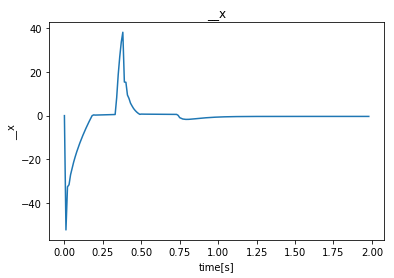

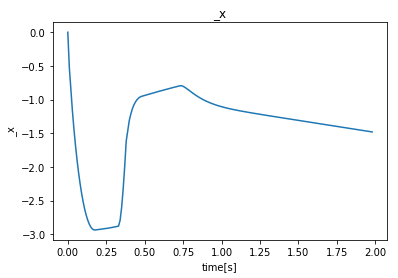

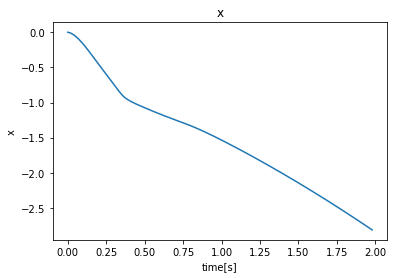

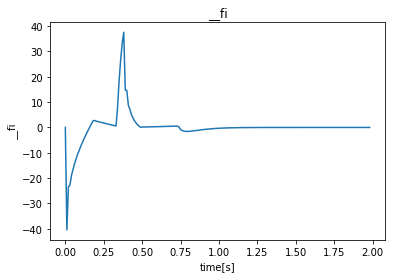

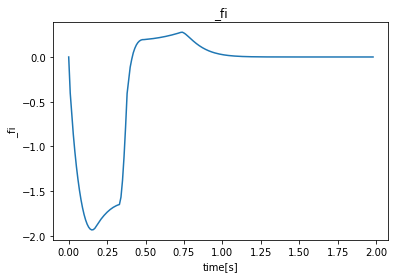

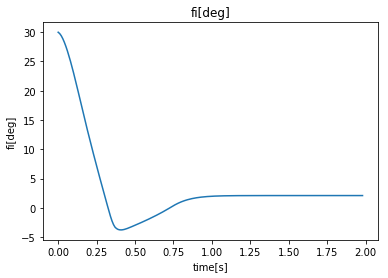

In [10]:
r = Record()
r.position_set(30)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(200):    
    estimated_force2.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force2.input['x'] = r.record['x'][0]
    estimated_force2.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force2.compute()

    r.move([(estimated_force2.output['force'], 0.01)], dt_min=0.01)
    print("angle: %0.2f  speed: %0.2f  time: %0.2f force: %d" % (r.record['fi'][0]*180/np.pi, 
                                                       r.record['_fi'][0],
                                                       r.record['t'][0],
                                                       estimated_force2.output['force']))

r.visualize(['move'], r.stack_of_movement, separately=True)

angle: 59.89  speed: -0.20  time: 0.01 force: 393
angle: 59.68  speed: -0.36  time: 0.02 force: 361
angle: 59.39  speed: -0.50  time: 0.03 force: 337
angle: 59.03  speed: -0.64  time: 0.04 force: 317
angle: 58.59  speed: -0.77  time: 0.05 force: 301
angle: 58.08  speed: -0.88  time: 0.06 force: 286
angle: 57.51  speed: -1.00  time: 0.07 force: 274
angle: 56.88  speed: -1.11  time: 0.08 force: 263
angle: 56.18  speed: -1.21  time: 0.09 force: 253
angle: 55.43  speed: -1.31  time: 0.10 force: 244
angle: 54.62  speed: -1.41  time: 0.11 force: 235
angle: 53.76  speed: -1.51  time: 0.12 force: 228
angle: 52.84  speed: -1.60  time: 0.13 force: 220
angle: 51.87  speed: -1.69  time: 0.14 force: 213
angle: 50.85  speed: -1.78  time: 0.15 force: 205
angle: 49.78  speed: -1.87  time: 0.16 force: 198
angle: 48.65  speed: -1.96  time: 0.17 force: 190
angle: 47.49  speed: -2.04  time: 0.18 force: 183
angle: 46.27  speed: -2.12  time: 0.19 force: 175
angle: 45.01  speed: -2.20  time: 0.20 force: 168


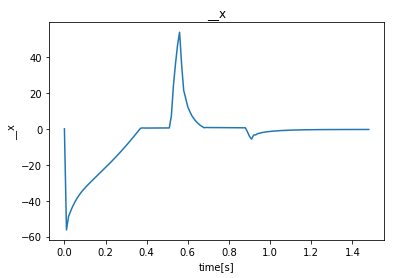

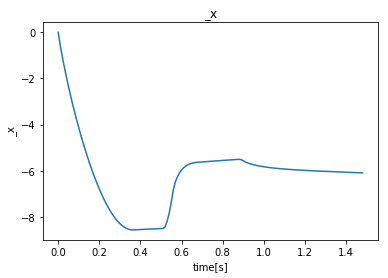

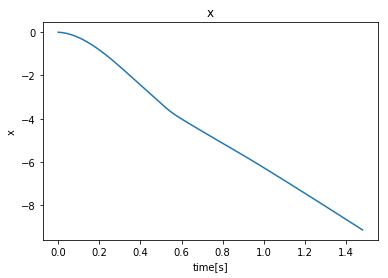

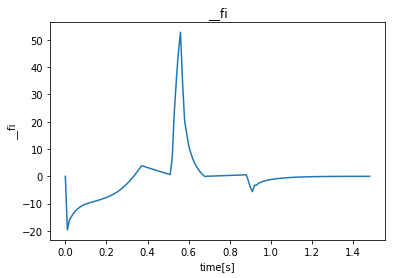

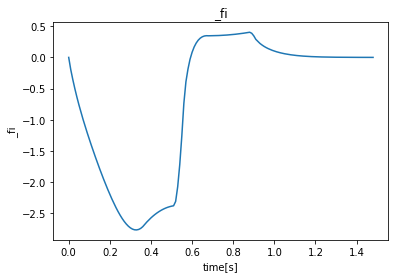

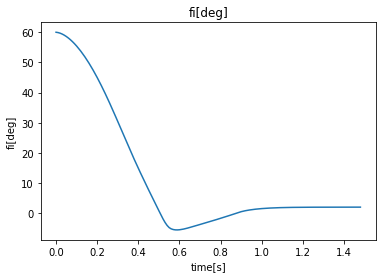

In [12]:
r = Record()
r.position_set(60)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(150):    
    estimated_force2.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force2.input['x'] = r.record['x'][0]
    estimated_force2.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force2.compute()

    r.move([(estimated_force2.output['force'], 0.01)], dt_min=0.01)
    print("angle: %0.2f  speed: %0.2f  time: %0.2f force: %d" % (r.record['fi'][0]*180/np.pi, 
                                                       r.record['_fi'][0],
                                                       r.record['t'][0],
                                                       estimated_force2.output['force']))

r.visualize(['move'], r.stack_of_movement, separately=True)

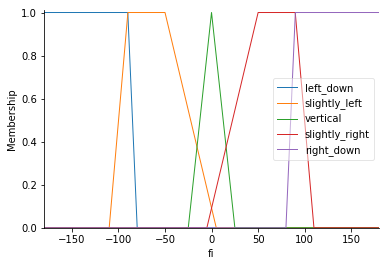

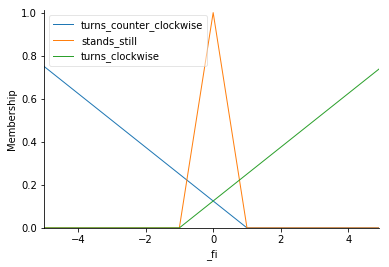

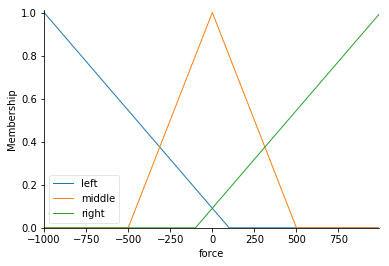

In [28]:
fi = ctrl.Antecedent(np.arange(-180, 180, 0.1), 'fi')
_fi = ctrl.Antecedent(np.arange(-5, 5, 0.1), '_fi')
force = ctrl.Consequent(np.arange(-1000, 1000, 10), 'force')

fi['left_down'] = fuzz.trapmf(fi.universe, [-190, -190, -90, -80])
fi['slightly_left'] = fuzz.trapmf(fi.universe, [-110, -90, -50, 5])
fi['vertical'] = fuzz.trimf(fi.universe, [-25, 0, 25])
fi['slightly_right'] = fuzz.trapmf(fi.universe, [-5, 50, 90, 110])
fi['right_down'] = fuzz.trapmf(fi.universe, [80, 90, 190, 190])

_fi['turns_counter_clockwise'] = fuzz.trapmf(_fi.universe, [-7, -7, -7, 1])
_fi['stands_still'] = fuzz.trimf(_fi.universe, [-1,  0, 1])
_fi['turns_clockwise'] = fuzz.trapmf(_fi.universe, [-1, 7, 7, 7])


force['left'] = fuzz.trimf(force.universe, [-1000, -1000, 100])
force['middle'] = fuzz.trimf(force.universe, [-500, 0, 500])
force['right'] = fuzz.trimf(force.universe, [-100, 1000, 1000])

fi.view()
_fi.view()
force.view()

In [35]:
rule1 = ctrl.Rule(fi['slightly_right'], force['right'])
rule2 = ctrl.Rule(fi['slightly_left'], force['left'])

rule3 = ctrl.Rule(fi['slightly_left'] & _fi['turns_clockwise'], force['right'])
rule4 = ctrl.Rule(fi['slightly_right'] & _fi['turns_counter_clockwise'], force['left'])

rule5 = ctrl.Rule(fi['left_down'] | _fi['turns_counter_clockwise'], force['left'])
rule6 = ctrl.Rule(fi['right_down'] | _fi['turns_clockwise'], force['right'])


In [36]:
force_controler2 = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
estimated_force2 = ctrl.ControlSystemSimulation(force_controler2)

angle: -175.36  speed: -0.62  time: 0.01 force: -429
angle: -176.06  speed: -1.23  time: 0.02 force: -547
angle: -177.19  speed: -1.97  time: 0.03 force: -633
angle: -178.72  speed: -2.67  time: 0.04 force: -633
angle: -180.65  speed: -3.37  time: 0.05 force: -633
angle: -182.98  speed: -4.07  time: 0.06 force: -633
angle: -185.72  speed: -4.78  time: 0.07 force: -633
angle: -188.85  speed: -5.47  time: 0.08 force: -633
angle: -192.39  speed: -6.17  time: 0.09 force: -633
angle: -196.32  speed: -6.87  time: 0.10 force: -633
angle: -200.66  speed: -7.56  time: 0.11 force: -633
angle: -205.38  speed: -8.25  time: 0.12 force: -633
angle: -210.51  speed: -8.94  time: 0.13 force: -633
angle: -216.02  speed: -9.63  time: 0.14 force: -633
angle: -221.92  speed: -10.30  time: 0.15 force: -633
angle: -228.20  speed: -10.95  time: 0.16 force: -633
angle: -234.82  speed: -11.57  time: 0.17 force: -633
angle: -241.77  speed: -12.13  time: 0.18 force: -633
angle: -249.00  speed: -12.61  time: 0.19 

angle: -24.70  speed: 3.36  time: 1.63 force: -17
angle: -22.80  speed: 3.32  time: 1.64 force: -4
angle: -20.93  speed: 3.26  time: 1.65 force: 9
angle: -19.10  speed: 3.20  time: 1.66 force: 23
angle: -17.31  speed: 3.12  time: 1.67 force: 38
angle: -15.57  speed: 3.03  time: 1.68 force: 53
angle: -13.89  speed: 2.93  time: 1.69 force: 68
angle: -12.28  speed: 2.81  time: 1.70 force: 83
angle: -10.74  speed: 2.68  time: 1.71 force: 99
angle: -9.29  speed: 2.53  time: 1.72 force: 114
angle: -7.93  speed: 2.38  time: 1.73 force: 128
angle: -6.67  speed: 2.20  time: 1.74 force: 141
angle: -5.51  speed: 2.02  time: 1.75 force: 154
angle: -4.46  speed: 1.83  time: 1.76 force: 165
angle: -3.53  speed: 1.63  time: 1.77 force: 173
angle: -2.72  speed: 1.42  time: 1.78 force: 180
angle: -2.03  speed: 1.21  time: 1.79 force: 183
angle: -1.45  speed: 1.00  time: 1.80 force: 184
angle: -0.99  speed: 0.80  time: 1.81 force: 180
angle: -0.64  speed: 0.61  time: 1.82 force: 172
angle: -0.39  speed:

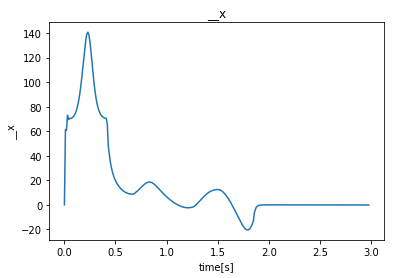

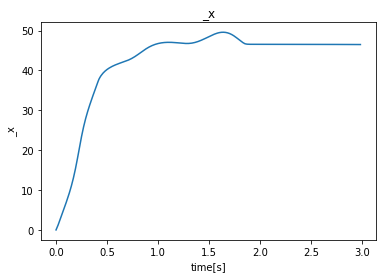

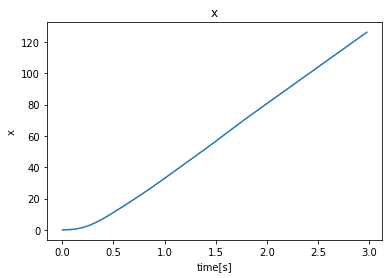

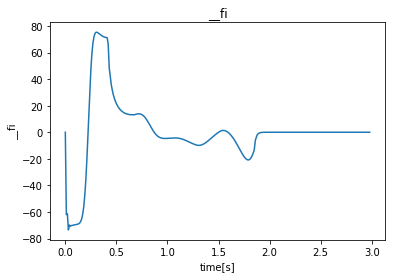

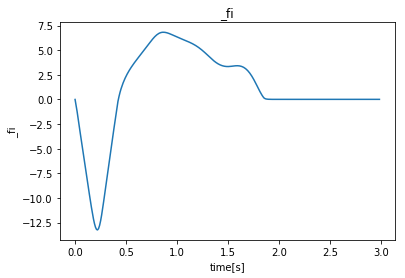

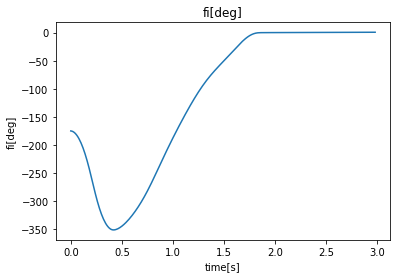

In [44]:
r = Record()
r.position_set(-175)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(300):    
    estimated_force2.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force2.input['x'] = r.record['x'][0]
    estimated_force2.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force2.compute()

    r.move([(estimated_force2.output['force'], 0.01)], dt_min=0.01)
    print("angle: %0.2f  speed: %0.2f  time: %0.2f force: %d" % (r.record['fi'][0]*180/np.pi, 
                                                       r.record['_fi'][0],
                                                       r.record['t'][0],
                                                       estimated_force2.output['force']))

r.visualize(['move'], r.stack_of_movement, separately=True)

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(-168)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

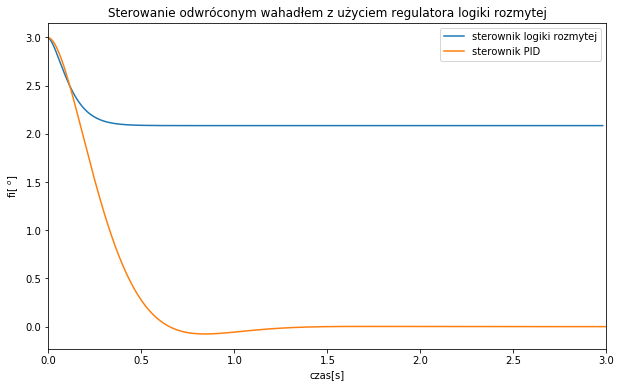

In [57]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora logiki rozmytej")

starting_angle = 3

r = Record()
r.position_set(starting_angle)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(300):    
    estimated_force2.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force2.input['x'] = r.record['x'][0]
    estimated_force2.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force2.compute()

    r.move([(estimated_force2.output['force'], 0.01)], dt_min=0.01)
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik logiki rozmytej"))


Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(starting_angle)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik PID"))

plt.xlim(0,3)
plt.legend()
plt.show()

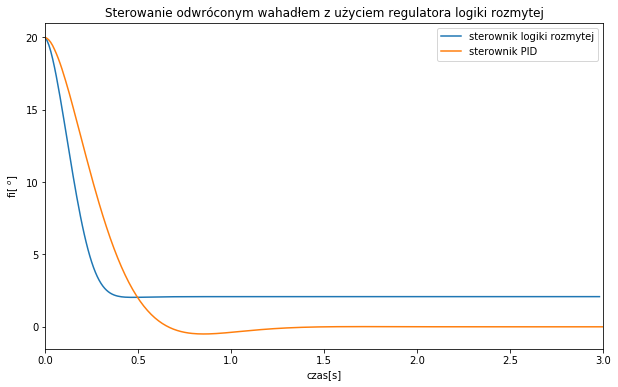

In [58]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora logiki rozmytej")

starting_angle = 20

r = Record()
r.position_set(starting_angle)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(300):    
    estimated_force2.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force2.input['x'] = r.record['x'][0]
    estimated_force2.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force2.compute()

    r.move([(estimated_force2.output['force'], 0.01)], dt_min=0.01)
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik logiki rozmytej"))


Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(starting_angle)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik PID"))

plt.xlim(0,3)
plt.legend()
plt.show()

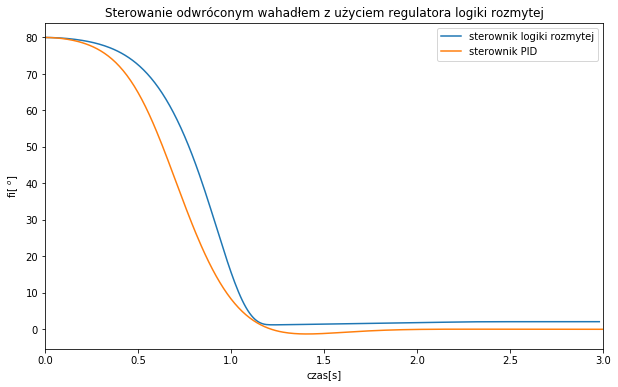

In [62]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora logiki rozmytej")

starting_angle = 80

r = Record()
r.position_set(starting_angle)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(300):    
    estimated_force2.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force2.input['x'] = r.record['x'][0]
    estimated_force2.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force2.compute()

    r.move([(estimated_force2.output['force'], 0.01)], dt_min=0.01)
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik logiki rozmytej"))


Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(starting_angle)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik PID"))

plt.xlim(0,3)
plt.legend()
plt.show()

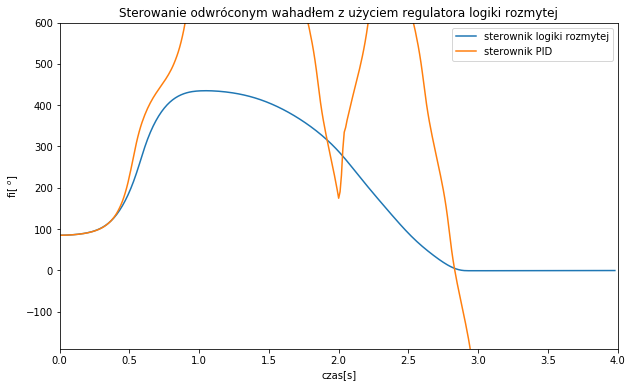

In [59]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora logiki rozmytej")

starting_angle = 85

r = Record()
r.position_set(starting_angle)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(400):    
    estimated_force2.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force2.input['x'] = r.record['x'][0]
    estimated_force2.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force2.compute()

    r.move([(estimated_force2.output['force'], 0.01)], dt_min=0.01)
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik logiki rozmytej"))


Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(starting_angle)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik PID"))

plt.xlim(0,4)
plt.ylim(-190, 600)
plt.legend()
plt.show()

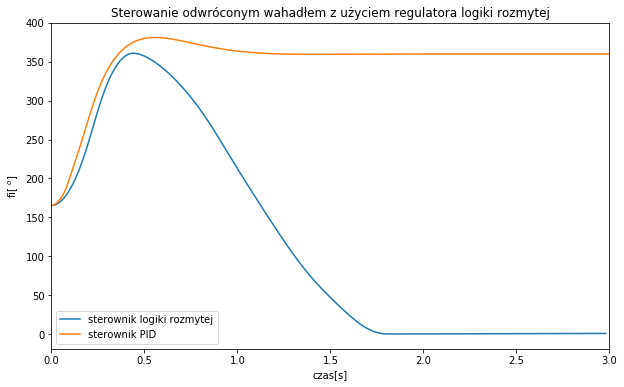

In [61]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora logiki rozmytej")

starting_angle = 165

r = Record()
r.position_set(starting_angle)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(300):    
    estimated_force2.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force2.input['x'] = r.record['x'][0]
    estimated_force2.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force2.compute()

    r.move([(estimated_force2.output['force'], 0.01)], dt_min=0.01)
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik logiki rozmytej"))


Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(starting_angle)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik PID"))

plt.xlim(0,3)
plt.legend()
plt.show()

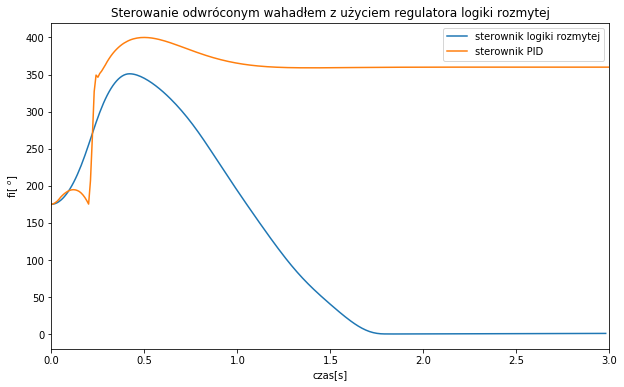

In [60]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora logiki rozmytej")

starting_angle = 175

r = Record()
r.position_set(starting_angle)
angle, trolley = r.record['fi'][0]*180/np.pi, r.record['x'][0]

for i in range(300):    
    estimated_force2.input['fi'] = r.record['fi'][0]*180/np.pi
    #estimated_force2.input['x'] = r.record['x'][0]
    estimated_force2.input['_fi'] = r.record['_fi'][0]
    #estimated_force.input['_x'] = r.record['_x'][0]
    estimated_force2.compute()

    r.move([(estimated_force2.output['force'], 0.01)], dt_min=0.01)
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik logiki rozmytej"))


Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(starting_angle)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("sterownik PID"))

plt.xlim(0,3)
plt.legend()
plt.show()